In [3]:
SAVE = True 
SAVE_PATH = "../charts/"

In [4]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("../found.csv")
df.head()

,peer,cid,filesAsStr
0,12D3KooWBA3FLioUQPqtj3RT4fxbquGNyb2hfQwXq8UTt5...,QmNb2LcaN8hzSNp4g7z8FtLsqvNyo3XDiR1gnDna1TWMqe,".git,README.md,main.py,"
1,12D3KooWGc7qCqwQvx9r96hwtmVhJSiXKK1qMFunXP3Kic...,QmUVTKsrYJpaxUT7dr9FpKq6AoKHhEM7eG1ZHGL56haKLG,"text/plain,"
2,12D3KooWQvVfZMKUaMeDBS7QPHL2APY4ANDPUzyaCSesos...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN
3,12D3KooWBFjLgj4rdUUfLdmXwrtVgrq5FiyjkxoJYQNVT5...,NaN,NaN
4,12D3KooWT1jCHWHYxtgsKvNqK6a3n2u5U9pfqjfWtjhdVL...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN


In [5]:
EMPTY_CID = "QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn"
MY_PEERID = "12D3KooWBA3FLioUQPqtj3RT4fxbquGNyb2hfQwXq8UTt5xmxuCi"
df = df[df["peer"] != MY_PEERID]
total = len(df["peer"].unique())
total

8295

In [6]:
cids = []
for i, cid in enumerate(df["cid"].dropna().unique()[:20]):
    if cid != None or cid != EMPTY_CID:
        cids.append(cid)
cids

['QmUVTKsrYJpaxUT7dr9FpKq6AoKHhEM7eG1ZHGL56haKLG',
 'QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn',
 'QmU14JgCGns98PQoZ3oENV559jGnsG3kXtCjEKoqTbM7j9',
 'Qmf4LMVhe94H3vBWnxBzDyaHoSUYnaRqXN5z18fUrwFQqJ',
 'QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFXiXoQMC',
 'QmWj827Jm1tvrz2gQmqtFjeALtvmZdfWHJfCwfYqX6QMvW',
 'QmRFzBRH43QcnyFL1T8ifYbFcobg11CueKUM4KKdbvWJEj',
 'bafybeibfjuheszjnsj4qwgfjn2y65r3h7gsmq4g3mllrdaq6wixnpd2paq',
 'QmQdgLZP3ahz4FcCR35VXZEeez1ZBK4xM5cCzAgJYSB1hp',
 'QmSpjaeFnZq3FEw8mbAj1Nj5nKkVmFSkhnV6R7TgJYzd9d',
 'QmUrTiPXCPcg7N3FuhEtqgHoS6JpfWnUMaY8xK82qsUve9',
 'bafybeiatmr27mek4uinkvh7ou7q4ryk7pdfq4toiuwqzufz4lwggxlwp74',
 'QmRR3kqk46rFU8zCpe63fLsPAtKpSo7TUHqL5cYv5voAjQ/',
 'QmRBRRq8EfU38QjgxFQ1M7BDcn9Y87Tx8K19Jt2x6VEj3a',
 'bafybeigy3qiei4mpepfvq75hi5nzbwyjbg2viws5cjyzlkcb72jihoghs4',
 'QmTWaPf6394B3pZpBnGbHv4Jf79N3PjrK5v7bNXPU7oJxo',
 'QmaJegxhjiqho2fv6pTHCAnXjZxWg2jAy9q6m1zsR3tPsk',
 'QmNN37tKyeoR9iUt7E3XCMoVDB68gxhEicrZrA9FXir1sK',
 'bafkreie6kj5kgblmzzt7gtdqibiycwduwrklzrw

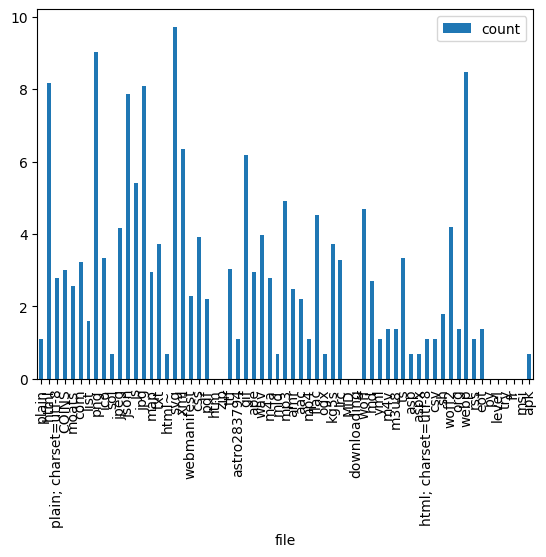

In [7]:
from collections import defaultdict
files = list(df["filesAsStr"][df["filesAsStr"].notnull()].values)
types_of_files = defaultdict(int) 
for file in files: 
    if "," in file: 
        for f in file.split(","):
            if "." in f: 
                types_of_files[f.split(".")[-1]]+=1
            elif "/" in f: 
                types_of_files[f.split("/")[1]]+=1
    else:
        types_of_files[file] +=1 
#del types_of_files["png"]
#del types_of_files["svg"]
#del types_of_files["json"]
temp = {
    "file":[],
    "count":[]
}
for k,v in types_of_files.items():
    temp["file"].append(k)
    temp["count"].append(np.log(v))
types_of_files = dict(types_of_files)
pd.DataFrame(temp).set_index("file").plot.bar()
if SAVE: 
    plt.savefig(SAVE_PATH+"format_count.png",bbox_inches='tight')

In [8]:
df_cids = df.dropna(subset=["cid"])[:1000]
df_cids[~df_cids['cid'].duplicated(keep=False)]["peer"].to_clipboard()


In [9]:
import pandas as pd 
df = pd.read_csv("../cid_data.csv")
df = df[df["peer"] != MY_PEERID]
df = df.drop_duplicates()
unique_nr_peers = len(df["peer"].unique())
print("number of unique peers with IPNS CID",unique_nr_peers)

number of unique peers with IPNS CID 103


In [10]:
def reversed_sort_dict_by_value(dic:dict)-> dict:
    return {key:val for key, val in reversed(sorted(dic.items(), key=lambda item: item[1]))}

## From cid data 

In [11]:
import pandas as pd 
df = pd.read_csv("../cid_data.csv")
df = df[df["peer"] != MY_PEERID]
df = df[df["peer"] != EMPTY_CID]
df["peer"] = df["peer"].apply(lambda p: p[:3] + '...' + p[-5:])
df = df.drop_duplicates()
df = df.reset_index(drop=True)
print(len(df["peer"].unique()))
df.head()

103


,peer,cid,filename,size,format
0,12D...HFTeF,/ipfs/QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFX...,bootstrap.min.css,121865,text/plain; charset=utf-8
1,12D...HFTeF,/ipfs/QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFX...,solidnames.png,19211,image/png
2,12D...HFTeF,/ipfs/QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFX...,style.css,3058,text/plain; charset=utf-8
3,12D...HFTeF,QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFXiXoQMC...,index.html,2140,text/html; charset=utf-8
4,12D...o1noo,QmWj827Jm1tvrz2gQmqtFjeALtvmZdfWHJfCwfYqX6QMvW,NONE,1400,application/json


In [12]:
from collections import defaultdict
import copy
import numpy as np

peer_size = {}
peer_size["peer"] = df["peer"]
peer_size["size"] = df["size"]

peer_size_count = defaultdict(int)
for i, p in enumerate(peer_size["peer"]): 
    peer_size_count[p]+=peer_size["size"][i]

peer_size_count_no_filter = copy.deepcopy(peer_size_count)
peer_size_count = {p:s for p,s in peer_size_count.items() if s > 2**23}

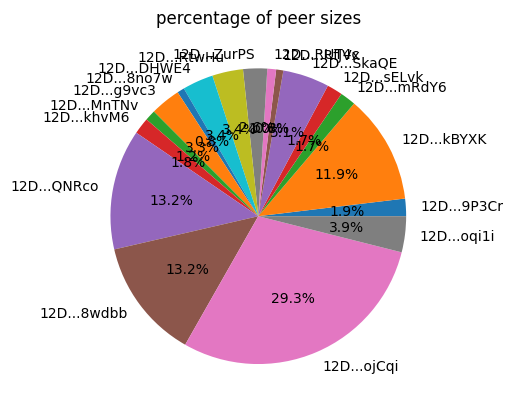

In [13]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.pie(list(peer_size_count.values()), labels=list(peer_size_count.keys()), autopct='%1.1f%%')
plt.title("percentage of peer sizes")

if SAVE: 
    plt.savefig(SAVE_PATH+"peer_size_pie.png",bbox_inches='tight')

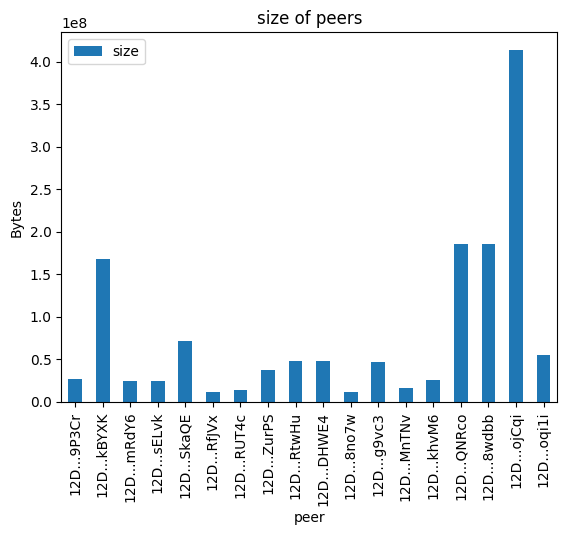

In [14]:
size_df = pd.DataFrame({"peer":list(peer_size_count.keys()), "size":list(peer_size_count.values())})
ax = size_df.set_index("peer").plot.bar(title="size of peers")
ax.set_ylabel("Bytes")
if SAVE: 
    plt.savefig(SAVE_PATH+"peer_size.png",bbox_inches='tight')

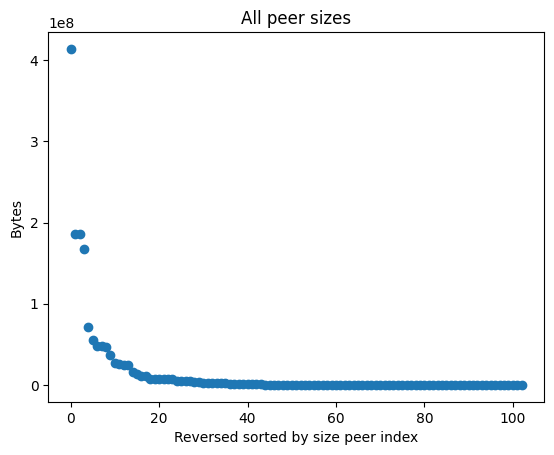

In [15]:

fig, ax = plt.subplots()
peer_size_count_no_filter = {peer_id: size for peer_id, size in reversed(sorted(peer_size_count_no_filter.items(), key=lambda item: item[1]))}

ax.scatter([i for i in range(len(peer_size_count_no_filter))],list(peer_size_count_no_filter.values()))
plt.title("All peer sizes")
plt.xlabel("Reversed sorted by size peer index")
plt.ylabel("Bytes")
if SAVE: 
    plt.savefig(SAVE_PATH+"peer_size_all.png",bbox_inches='tight')

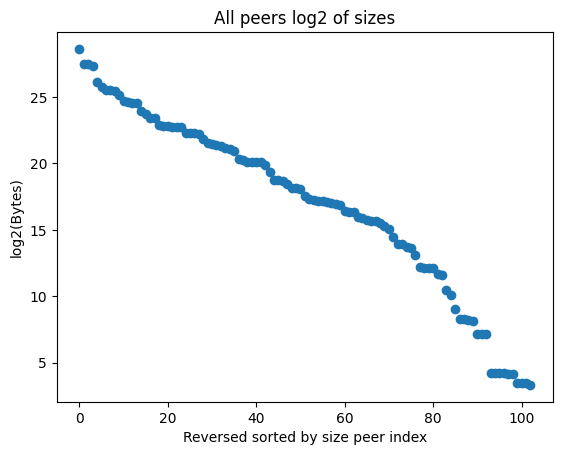

In [16]:
fig, ax = plt.subplots()
peer_size_count_no_filter_log = {peer_id: np.log2(size) for peer_id, size in reversed(sorted(peer_size_count_no_filter.items(), key=lambda item: item[1]))}

ax.scatter([i for i in range(len(peer_size_count_no_filter_log))],list(peer_size_count_no_filter_log.values()))
plt.title("All peers log2 of sizes")
plt.xlabel("Reversed sorted by size peer index")
plt.ylabel("log2(Bytes)")
if SAVE: 
    plt.savefig(SAVE_PATH+"peer_size_all_log.png",bbox_inches='tight')

In [17]:
df["format"].unique()

array(['text/plain; charset=utf-8', 'image/png',
       'text/html; charset=utf-8', 'application/json', 'text/plain',
       'video/mp4', 'image/gif', 'application/octet-stream',
       'application/rss+xml', 'image/x-icon', 'image/svg+xml',
       'application/javascript', 'image/jpeg', 'video/x-m4v',
       'application/vnd.apple.mpegurl', 'text/html; charset=windows-1252',
       'text/xml; charset=utf-8', 'text/csv', 'font/ttf',
       'video/quicktime', 'application/pdf', 'text/x-python',
       'text/html; charset=iso-8859-1', 'font/woff', 'font/woff2',
       'text/html; charset=windows-1251', 'image/webp',
       'application/x-ole-storage', 'application/zip'], dtype=object)

average file size 1511904565


1511904565

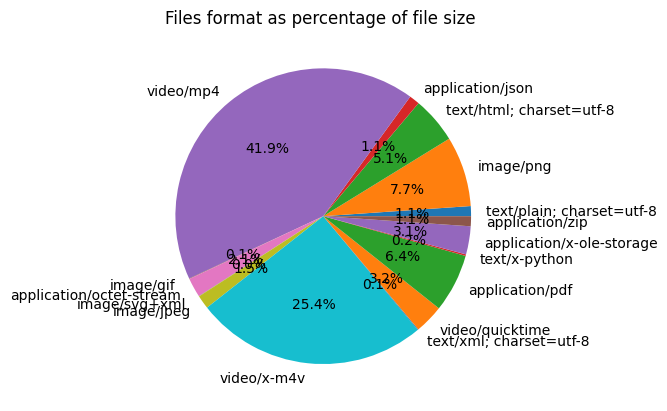

In [18]:
format_size_count = defaultdict(int)
_sum = 0
print("average file size", df["size"].sum())
for i, f in enumerate(df["format"]):
    size =  df["size"][i]
    format_size_count[f] += size
    _sum += size

format_size_count = {f:s for f,s in format_size_count.items() if s > 2**19}

fig, ax = plt.subplots()
ax.pie(list(format_size_count.values()), labels=list(format_size_count.keys()), autopct='%1.1f%%')
plt.title("Files format as percentage of file size ")
if SAVE: 
    plt.savefig(SAVE_PATH+"files_format_prec.png",bbox_inches='tight')
_sum 

In [19]:

df.head()

,peer,cid,filename,size,format
0,12D...HFTeF,/ipfs/QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFX...,bootstrap.min.css,121865,text/plain; charset=utf-8
1,12D...HFTeF,/ipfs/QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFX...,solidnames.png,19211,image/png
2,12D...HFTeF,/ipfs/QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFX...,style.css,3058,text/plain; charset=utf-8
3,12D...HFTeF,QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFXiXoQMC...,index.html,2140,text/html; charset=utf-8
4,12D...o1noo,QmWj827Jm1tvrz2gQmqtFjeALtvmZdfWHJfCwfYqX6QMvW,NONE,1400,application/json


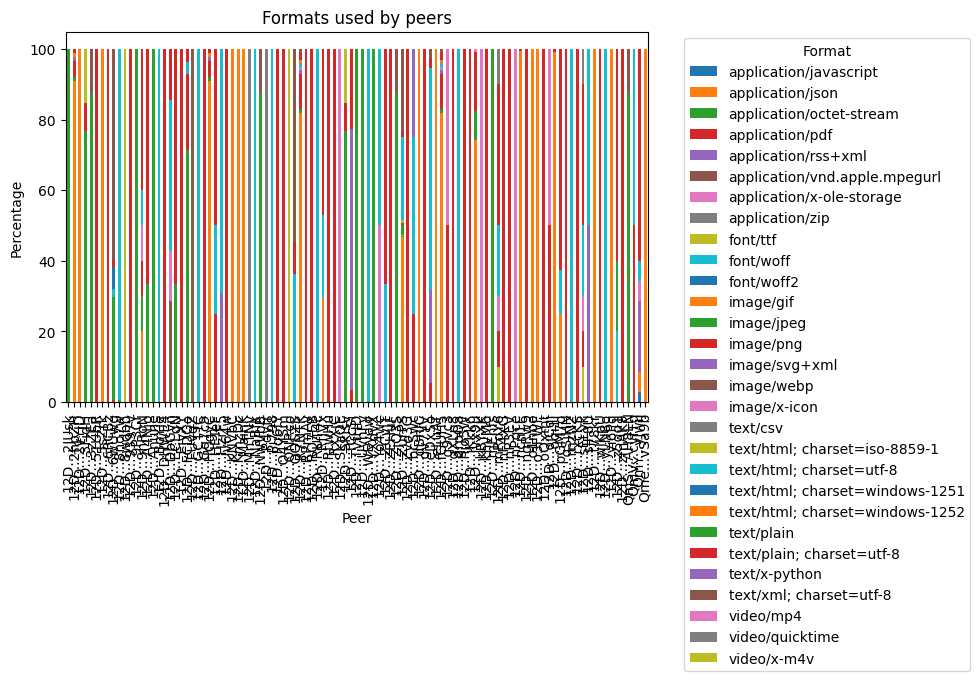

In [20]:
df_format_prec = df.groupby(['peer', 'format']).size().unstack(fill_value=0)
df_format_prec = df_format_prec.div(df_format_prec.sum(axis=1), axis=0) * 100
df_format_prec.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Peer')
plt.ylabel('Percentage')
plt.title('Formats used by peers')
plt.legend(title='Format', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

if SAVE: 
    plt.savefig(SAVE_PATH+"formats_used_by_nodes.png",bbox_inches='tight')


/tmp/ipykernel_9457/111412912.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["filename"][i] = df_temp["format"][i]
/tmp/ipykernel_9457/111412912.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["filename"][i] = df_temp["format"][i]
/tmp/ipykernel_9457/111412912.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["filename"][i] = df_temp["format"][i]
/tmp/ipykernel_9457/111412912.py:7: SettingWithCopyWarn

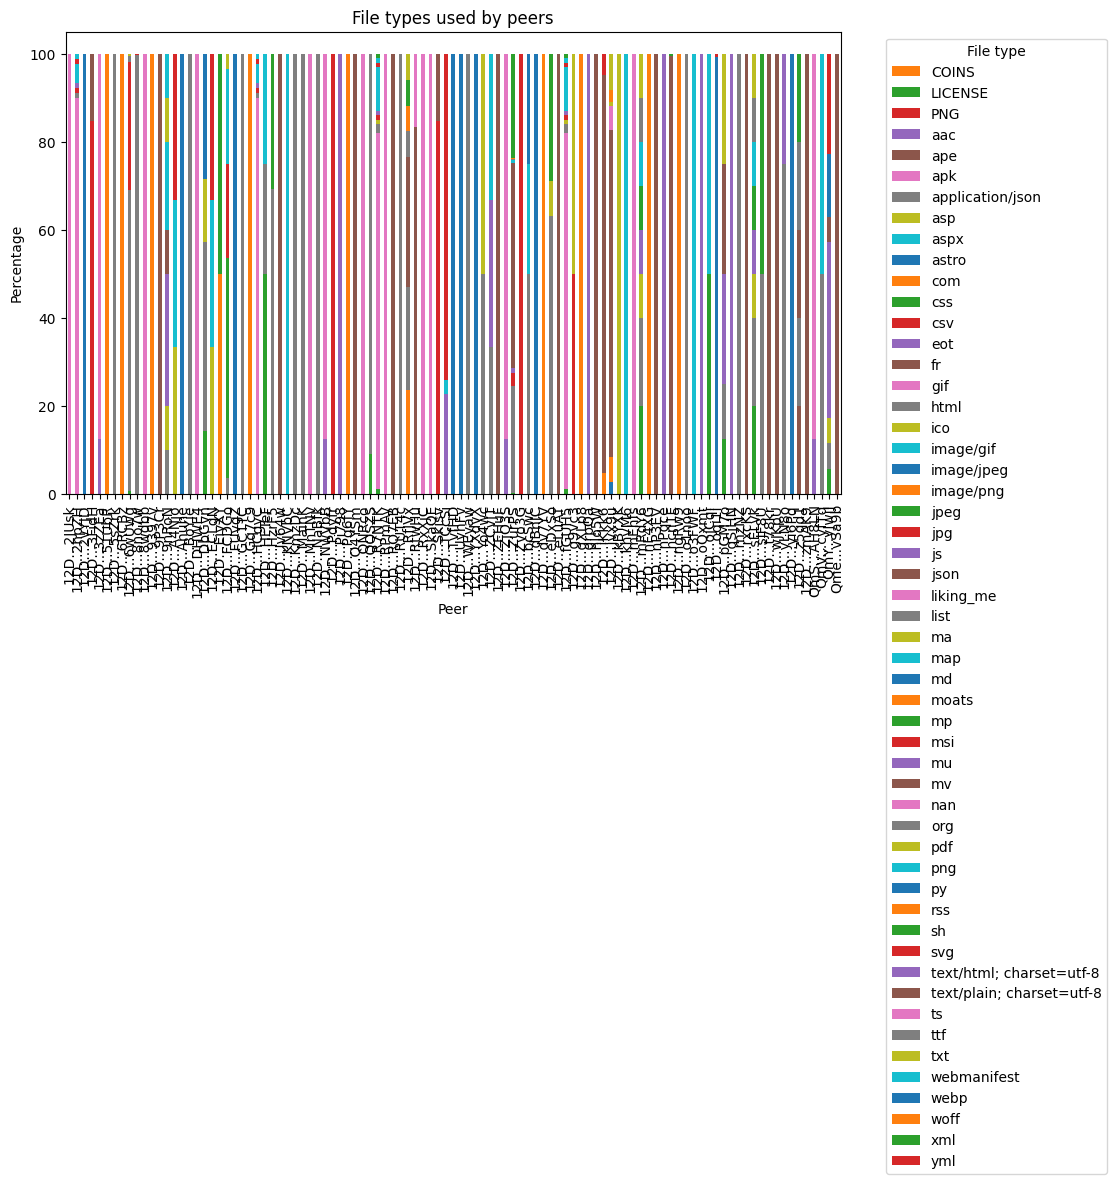

In [21]:
df_temp = df.copy()
df_temp["filename"] = df_temp["filename"].apply(lambda f: str(f))
df_temp["filename"] = df_temp["filename"].apply(lambda f: ''.join([c for c in f if not c.isdigit()]))
df_temp["filename"] = df_temp["filename"].apply(lambda f: f.split(".")[-1])
for i, filename in enumerate(df_temp["filename"]):
    if filename == "NONE":
        df_temp["filename"][i] = df_temp["format"][i]
df_file_name_peer = df_temp.groupby(['peer', 'filename']).size().unstack(fill_value=0)
df_file_name_peer= df_file_name_peer.div(df_file_name_peer.sum(axis=1), axis=0) * 100
df_file_name_peer.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Peer')
plt.ylabel('Percentage')
plt.title('File types used by peers')
plt.legend(title='File type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


In [22]:
df.head()

,peer,cid,filename,size,format
0,12D...HFTeF,/ipfs/QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFX...,bootstrap.min.css,121865,text/plain; charset=utf-8
1,12D...HFTeF,/ipfs/QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFX...,solidnames.png,19211,image/png
2,12D...HFTeF,/ipfs/QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFX...,style.css,3058,text/plain; charset=utf-8
3,12D...HFTeF,QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFXiXoQMC...,index.html,2140,text/html; charset=utf-8
4,12D...o1noo,QmWj827Jm1tvrz2gQmqtFjeALtvmZdfWHJfCwfYqX6QMvW,NONE,1400,application/json


31
['CODE_OF_CONDUCT.md', 'ARCHITECTURE.md', 'DEPLOYMENT.md', 'OVERVIEW.md', 'PHILOSOPHY.md']
number of markdown files: 5


Text(0.5, 0, 'File extension ')

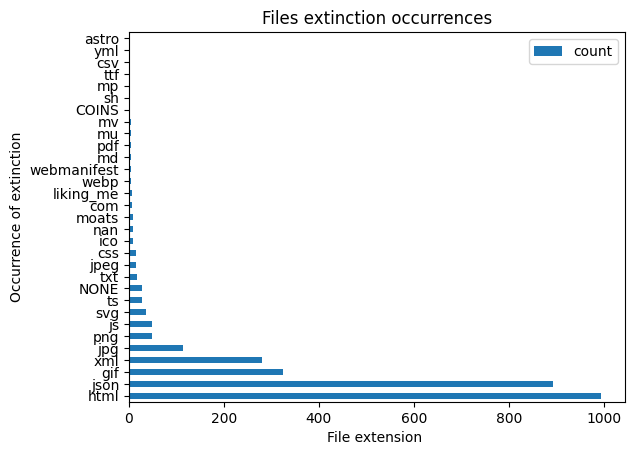

In [23]:
file_type_count = defaultdict(int)
markdown_files = []
for t in df["filename"]:
    ftype = str(t).split(".")[-1]
    ftype = ''.join([c for c in ftype if not c.isdigit()])
    if ftype == "":
        ftype = str(t)
    if ftype == "md": 
        markdown_files.append(t)
    file_type_count[ftype] += 1 

file_type_count = {t:c for t,c in file_type_count.items() if c > 2}
file_type_count = reversed_sort_dict_by_value(file_type_count)
print(len(file_type_count))

print(markdown_files)
print("number of markdown files:", len(markdown_files))

file_type_count = dict(file_type_count)
file_type_count = pd.DataFrame({"filetype": list(file_type_count.keys()), "count":list(file_type_count.values())})
file_type_count = file_type_count.set_index("filetype")
file_type_count.plot.barh()
plt.title("Files extinction occurrences")
plt.ylabel("Occurrence of extinction")
plt.xlabel("File extension ")




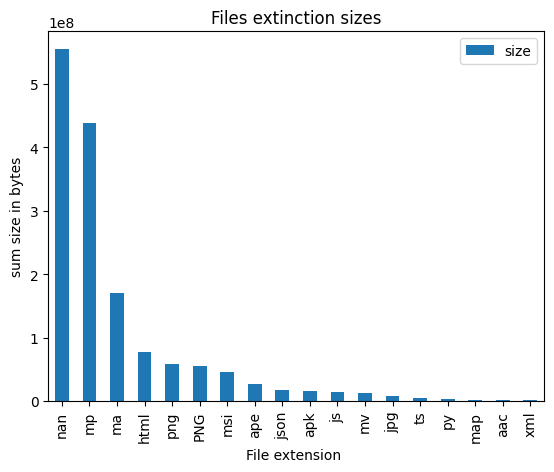

In [33]:
import numpy as np
file_type_size = defaultdict(int)
for i,t in enumerate(df["filename"]):
    ftype = str(t).split(".")[-1]
    ftype = ''.join([c for c in ftype if not c.isdigit()])
    if ftype == "":
        ftype = str(t)
    file_type_size[ftype] += int(df["size"][i])

file_type_count = dict(file_type_count)
file_type_size = { t:s for t,s in file_type_size.items() if s > 2**20}
file_type_size = reversed_sort_dict_by_value(file_type_size)

file_type_size = pd.DataFrame({"filetype": list(file_type_size.keys()), "size":list(file_type_size.values())})
file_type_size = file_type_size.set_index("filetype")
file_type_size.plot.bar()
plt.title("Files extinction sizes")
plt.ylabel("sum size in bytes")
plt.xlabel("File extension ")


if SAVE: 
    plt.savefig(SAVE_PATH+"file_extinction_size.png",bbox_inches='tight')

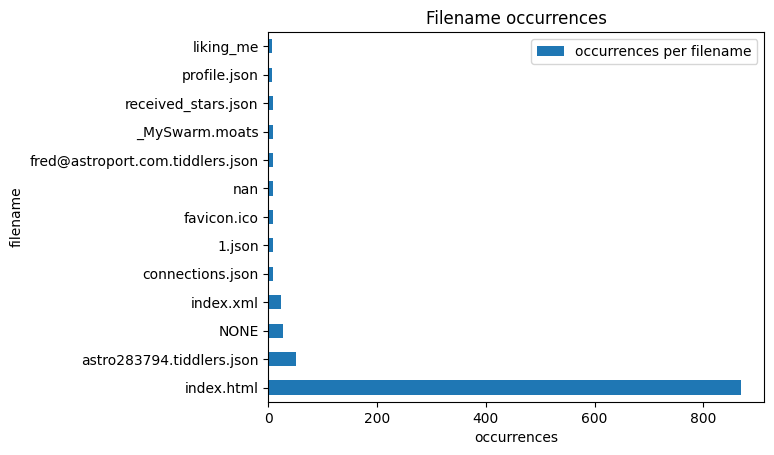

In [34]:
file_names_count = defaultdict(int)

for name in df["filename"]:
    file_names_count[str(name)] += 1

file_names_count = { f:c for f,c in file_names_count.items() if c > 5 }
file_names_count = reversed_sort_dict_by_value(file_names_count)


file_names_count = pd.DataFrame({"filename": list(file_names_count.keys()), "occurrences per filename":list(file_names_count.values())})
file_names_count = file_names_count.set_index("filename")
file_names_count.plot.barh()
plt.title("Filename occurrences")
plt.xlabel("occurrences")


if SAVE: 
    plt.savefig(SAVE_PATH+"filename_count.png",bbox_inches='tight')


In [26]:
searchable = []
for i, filename in enumerate(df["filename"]): 
        if "readme" in str(filename).lower():
            searchable.append(df["cid"][i])
            print(df["cid"][i])
            print("-"*10)

print("Number of possible readme files: ",len(searchable))

QmYaMCtgVF46b5jTJ9n95F5yTgw9ZYCRNupBeJrvnphjTW/README.html
----------
Number of possible readme files:  1


In [27]:
peers_with_index = []
for i,fn in enumerate(df["filename"]):
    p = df["cid"][i].split("/")[0]
    if "index.html" in str(fn) and not p in peers_with_index and p != "":
        peers_with_index.append(p)
print("Number of websites found:",len(peers_with_index))
print(peers_with_index)

Number of websites found: 15
['QmUWAPdR2N7wzAhuMxpvhE69rge9ayKTnFB6WtFXiXoQMC', 'QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU', 'QmR4kqBs7sis2dBuhfriAd4szr7VPERqnEvqvgaYvMomSj', 'QmXLt7pG2XfnPXv98GiL2Y3xXJiaAkE8oA3yCT6L6n6J57', 'QmVLMsn9dP6Uh2mCTdY2R5CDPKcZtnq7R6kcErmXohLDT2', 'QmSyVtPo3GegNrDQj93gUKAMehghPTZV2oo6gfJd5yU9SQ', 'QmYnfgAZfX111YhkJNN5JKUYv38T4s3NhZ1wJssAWCiExk', 'QmYPytb5JpD6jQ7sPDdPRa9jQLnj8hjk4wCeDwZQDiNBgi', 'Qmapmvi92Lf6yzHRj3uLuYXnPPL8QznkcBMUgijEtyWmyU', 'Qmcubtd8GBz8ihk2t6nWTHmw9ChvABcsWgm5u4tt1XRxGC', 'QmbyBDYob9rTHCxHgBhmr9t5FX7c8gMy2HnFz8EmRiCGrw', 'Qma4TxpzdcYqDMzpgGAHYCyjrsbin2C6hTnXvjbMUFondJ', 'QmYaMCtgVF46b5jTJ9n95F5yTgw9ZYCRNupBeJrvnphjTW', 'QmaYukD44EuV5HeQBa6yyZbC15FWnMzhHrcaFfkuRpyD42', 'QmYjrZNcJ6TLEbZySfTDs4NdkeohPGFTmtD4ZiCVmmLMPU']


format count relative to node size, meaning that files that occurs often on a lot of different nodes are the most relevant nodes.  

Peers with html: 34
22


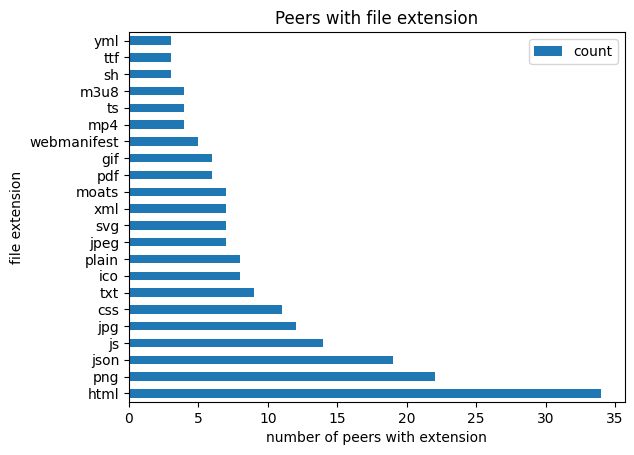

In [35]:
file_extension_peer_distribution = defaultdict(set)
NUMBER_OF_OCCURRENCES_MINIMUM = 2
for i,fn in enumerate(df["filename"]):
    file_extension = str(fn).split(".")[-1]
    if file_extension == "NONE" or file_extension == "nan":
        file_extension = df["format"][i].split(";")[0].split("/")[-1]
    peer = df["peer"][i]
    file_extension_peer_distribution[file_extension].add(peer)
print("Peers with html:",len(file_extension_peer_distribution["html"]))
file_extension_peer_distribution= {p:len(s) for p,s in file_extension_peer_distribution.items() if len(s) > NUMBER_OF_OCCURRENCES_MINIMUM}
print(len(file_extension_peer_distribution))
file_extension_peer_distribution = reversed_sort_dict_by_value(file_extension_peer_distribution)
fe_df = pd.DataFrame({"file extension":list(file_extension_peer_distribution.keys()), "count": list(file_extension_peer_distribution.values())})
fe_df = fe_df.set_index("file extension")
fe_df.plot.barh()
plt.title("Peers with file extension")
plt.xlabel("number of peers with extension")


if SAVE: 
    plt.savefig(SAVE_PATH+"peer_count_with_extension.png",bbox_inches='tight')

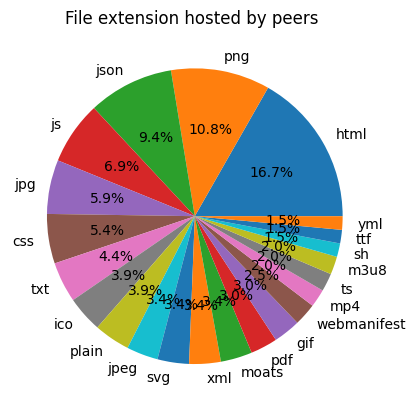

In [36]:
unique_nr_peers = len(df["peer"].unique())
file_extension_peer_distribution_prec = {p:s / unique_nr_peers for p,s in file_extension_peer_distribution.items()}
fig, ax = plt.subplots()
ax.pie(list(file_extension_peer_distribution_prec.values()), labels=list(
    file_extension_peer_distribution_prec.keys()), autopct='%1.1f%%')
plt.title("File extension hosted by peers ")

if SAVE: 
    plt.savefig(SAVE_PATH+"peer_count_with_extension_pie.png",bbox_inches='tight')

In [30]:
cnt = 0 
for i,cid in enumerate(df["cid"].unique()):
    if cid:
        cnt+=1
print(cnt)

2536


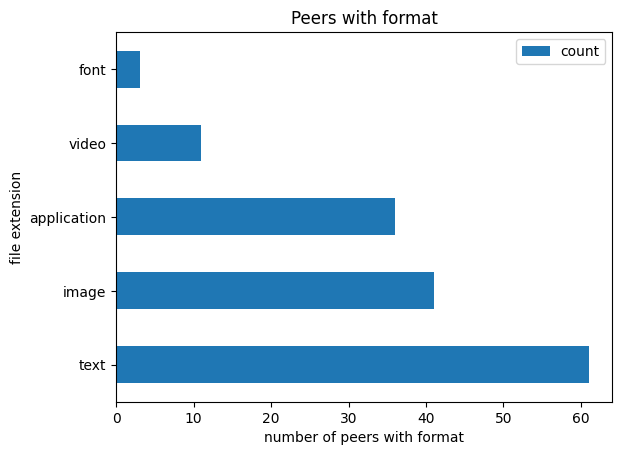

In [37]:
format_peer_distribution = defaultdict(set)
NUMBER_OF_OCCURRENCES_MINIMUM = 1

for i,fn in enumerate(df["filename"]):
    _format = df["format"][i].split("/")[0]
    peer = df["peer"][i]
    format_peer_distribution[_format].add(peer)

format_peer_distribution = {p:len(s) for p,s in format_peer_distribution.items() if len(s) > NUMBER_OF_OCCURRENCES_MINIMUM}
format_peer_distribution = reversed_sort_dict_by_value(format_peer_distribution)
fe_df = pd.DataFrame({"file extension":list(format_peer_distribution.keys()), "count": list(format_peer_distribution.values())})
fe_df = fe_df.set_index("file extension")
fe_df.plot.barh()
plt.title("Peers with format")
plt.xlabel("number of peers with format")

if SAVE: 
    plt.savefig(SAVE_PATH+"peers_count_format.png",bbox_inches='tight')

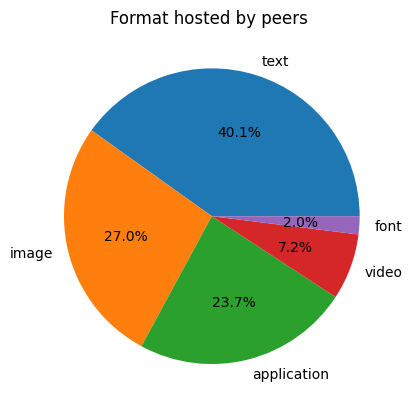

In [38]:
unique_nr_peers = len(df["peer"].unique())
format_peer_distribution_prec = {p:s / unique_nr_peers for p,s in format_peer_distribution.items()}
fig, ax = plt.subplots()
ax.pie(list(format_peer_distribution_prec.values()), labels=list(
    format_peer_distribution_prec.keys()), autopct='%1.1f%%')
plt.title("Format hosted by peers ")

if SAVE: 
    plt.savefig(SAVE_PATH+"peers_count_format_pie.png",bbox_inches='tight')